In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
sns.set_theme()

l1 = pd.read_csv('../data/MPG-L1.csv', sep = ';')
l2 = pd.read_csv('../data/MPG-L2.csv', sep = ';')
seriea  = pd.read_csv('../data/MPG-SERIEA.csv', sep = ';')
pl = pd.read_csv('../data/MPG-PL.csv', sep = ';')
liga = pd.read_csv('../data/MPG-LIGA.csv', sep = ';')
classements = pd.read_csv('../data/CLASSEMENTS.csv',sep =';')


In [2]:
l1['Championnat'] = 'Ligue 1'
l2['Championnat'] = 'Ligue 2'
seriea['Championnat'] = 'Serie A'
pl['Championnat'] = 'Premiere League'
liga['Championnat'] = 'Liga'
#On ajoute le championnat dans lequel chaque joueur joue pour pouvoir l'identifier plus tard.

In [3]:
all_players = pd.concat([l1,l2,seriea,pl,liga], axis = 0)
total = pd.merge(all_players, classements, on='Club')
total.set_index(all_players.index,inplace=True)
total = total.set_index('Joueur')
total.head()

#On regroupe les différents championnats dans un seul DataFrame.
#Puis on regroupe le dataframe 'Classement' avec les autres, en fusionnant par la colonne 'Club'.

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,j19,j18,j17,j16,j15,j14,j13,j12,j11,j10,j9,j8,j7,j6,j5,j4,j3,j2,j1,j38,j37,j36,j35,j34,j33,j32,j31,j30,j29,j28,j27,j26,j25,j24,j23,j22,j21,j20,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,DMI,Club,Prochain opposant,Date,Victoire probable,%Win+12J,%Win+16J,%Win+20J,Dispo@MPGLaurent?,Championnat,Classement,pts,J.,G.,N.,P.,p.,c.,+/-
Joueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1,35,1.31,0.00,1.49,13,0,32,0.88,0.00,0.94,1361,35,2960,80.06,35.0,84.57,105.0,93.0,5.0,3.77,4.5,0.0,5.0,6.5,6.5,5.0,6.0,8.0,7.0,5.0,6.0,5.0,5.0,7.5,6.5,4.5,9.0,7.0,0.0,8.5,8.0,6.0,8.0,4.0,7.0,5.0,9.0,9.0,3.5,7.0,0.0,8.0,5.0,6.0,6.5,6.5,7.0,5.0,7.5,2.0,NaN,2.0,2.0,12.0,32.0,0.8256,891.0,3.0,2.0,37.91,9.0,NaN,NaN,5.75,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,NaN,NaN,Ligue 1,1,47,19,15,2,2,48,14,34
Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2,29,1.40,0.00,1.40,11,0,21,0.88,1.00,0.93,1325,180,2355,77.94,90.0,81.21,120.0,112.0,4.5,3.73,4.5,4.5,0.0,6.0,5.5,7.5,7.5,0.0,6.5,4.5,5.0,6.0,6.5,6.0,6.5,6.5,9.0,7.5,9.0,7.0,0.0,6.5,6.5,6.0,0.0,7.0,9.0,8.0,4.0,6.0,4.5,5.5,4.5,0.0,0.0,0.0,0.0,0.0,7.0,2.0,NaN,NaN,10.0,12.0,10.0,0.8212,1381.0,2.0,12.0,49.51,22.0,NaN,NaN,4.5,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,NaN,NaN,Ligue 1,1,47,19,15,2,2,48,14,34
Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2,31,1.25,1.41,1.30,8,1,13,1.00,1.00,0.97,1312,180,2689,87.47,90.0,86.74,164.0,207.0,6.5,5.00,5.0,7.0,0.0,0.0,5.5,0.0,7.0,8.0,5.5,0.0,7.0,8.0,7.5,8.0,8.0,5.0,8.0,7.0,9.0,8.0,8.0,5.0,5.5,7.0,0.0,4.5,8.0,6.5,0.0,6.0,4.0,7.5,6.0,6.0,8.0,5.5,0.0,0.0,9.0,NaN,1.0,2.0,10.0,15.0,21.0,0.8355,1240.0,NaN,11.0,51.52,3.0,NaN,NaN,5.5,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,NaN,NaN,Ligue 1,1,47,19,15,2,2,48,14,34
Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1,32,1.19,0.00,1.01,3,0,4,0.76,0.00,0.81,1211,34,2365,71.24,34.0,73.91,404.0,591.0,6.0,7.00,4.5,0.0,4.0,5.0,7.0,5.0,0.0,4.0,6.0,5.0,4.0,5.0,5.5,5.0,4.5,5.0,7.5,7.0,7.5,6.0,5.0,5.0,6.0,5.0,6.5,5.0,5.5,5.5,3.5,6.5,0.0,0.0,5.0,6.0,5.5,0.0,0.0,0.0,7.0,NaN,NaN,1.0,1.0,4.0,6.0,0.8565,927.0,3.0,17.0,46.09,15.0,NaN,NaN,"5,00",Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,NaN,NaN,Ligue 1,1,47,19,15,2,2,48,14,34
Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6,21,1.09,1.37,1.14,3,3,6,0.46,0.83,0.52,505,372,943,38.85,62.0,44.90,168.0,157.0,6.0,4.33,4.0,7.0,6.0,4.0,7.0,6.0,0.0,4.5,0.0,0.0,5.0,0.0,4.5,4.5,4.5,0.0,0.0,4.5,4.0,6.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,5.0,7.0,3.0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,1.0,3.0,0.7718,239.0,4.0,4.0,39.29,7.0,NaN,NaN,"3,00",Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,NaN,NaN,Ligue 1,1,47,19,15,2,2,48,14,34


In [4]:
total = total[(total['Note']>0)]


fillna_zero = ['Min/But', 'Min/But 1 an', 'Min note/but', 'Cleansheet', 'But/Peno',
               'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
               'Ballons', 'Interceptions', 'Tacles', 'Fautes', '%Passes','%Duel',
               'But évité', 'Action stoppée','%Win+12J', '%Win+16J', '%Win+20J']
            

total[fillna_zero] = total[fillna_zero].fillna(0)

total['Enchère moy'] = total['Enchère moy'].fillna(total['Cote'])

#Traitement des NaN. Tout les NaN correspondent en réalité a des zeros, hormis l'enchère moyenne, qui est remplacée par la Cote.
#Exemple : Les Gardiens et certains joueurs de champs ne mettent pas de buts : NaN remplacé par zero.
#Exemple 2 : Certains attaquants ne font pas de tacles ou d'interceptions défensives : NaN remplacé par zero.


In [5]:
dispo_win = ['Dispo@MPGLaurent?','%Win+20J','%Win+16J','%Win+12J']
total = total.drop(dispo_win, axis = 1)
total = total.dropna(subset = ['Cote','Enchère moy'], how = 'all', axis = 0)

In [6]:
total.isna().sum()
#Il n'y a plus de NaN.

Poste                0
Cote                 0
Enchère moy          0
Note                 0
Note série           0
Note 1 an            0
Nb match             0
Nb match série       0
Nb match 1 an        0
Variation            0
Var série            0
Var 1 an             0
But                  0
Buts série           0
Buts 1 an            0
%Titu                0
%Titu série          0
%Titu 1 an           0
Temps                0
Tps série            0
Tps 1 an             0
Tps moy              0
Tps moy série        0
Tps moy 1 an         0
Min/But              0
Min/But 1 an         0
Min note/but         0
Prix/but             0
j19                  0
j18                  0
j17                  0
j16                  0
j15                  0
j14                  0
j13                  0
j12                  0
j11                  0
j10                  0
j9                   0
j8                   0
j7                   0
j6                   0
j5                   0
j4         

In [7]:
total['Var E/C'] = total.apply(lambda x : x['Enchère moy']-x['Cote'], axis = 1)
#Une nouvelle variable qui soustrait la Cote décidé par MPG à l'enchère moyenne des utilisateurs.
#Cela permet d'analyser d'éventuels écarts par poste, championnats etc.

In [8]:
conditionlist = [
    (total['Classement'] >= 15) ,
    (total['Classement'] >= 10) & (total['Classement'] <15),
    (total['Classement'] >= 5) & (total['Classement'] <10),
    (total['Classement'] <= 5)]
choicelist = ['4 - 15-20', '3 - 10-15', '2 - 5-10', '1 - 1-5']
total['Classement_range'] = np.select(conditionlist, choicelist, default='Not Specified')

#On regroupe les joueurs par rapport au classement de leur équipe dans leurs championnats respectifs.

In [9]:
conditionlist = [(total['Note'] >= 8) ,
                 (total['Note'] >= 6) & (total['Note'] <8),
                 (total['Note'] >= 4) & (total['Note'] <6),
                 (total['Note'] >= 2) & (total['Note'] <4),
                 (total['Note'] <= 0)]
choicelist = ['5 - 8 et plus', '4 - entre 6 et 8', '3 - entre 4 et 6', '2 - entre 2 et 4', '1 - moins de 2']
total['Note_range'] = np.select(conditionlist, choicelist, default='Not Specified')

#On regroupe les joueurs par rapport à leur note dans 5 catégories.

In [10]:
conditionlist2 = [(total['Enchère moy'] >= 80) ,
                  (total['Enchère moy'] >= 60) & (total['Enchère moy'] <80),
                  (total['Enchère moy'] >= 40) & (total['Enchère moy'] <60),
                  (total['Enchère moy'] >= 20) & (total['Enchère moy'] <40),
                  (total['Enchère moy'] <= 20)]
choicelist2 = ['5 - 80 et plus', '4 - entre 60 et 80', '3 - entre 40 et 60', '2 - entre 20 et 40', '1 - moins de 20']
total['Enchère_moy_range'] = np.select(conditionlist2, choicelist2, default='Not Specified')

#On compartimente les joueurs par rapport à leur Enchère Moy dans 5 catégories.

In [11]:
G = total[(total['Poste'] == 'G')]
      
D = total[(total['Poste'] == 'DC') | (total['Poste'] == 'DL')]

M = total[(total['Poste'] == 'MD') | (total['Poste'] == 'MO')]

A = total[(total['Poste'] == 'A')]

#On sous-divise le DataFrame 'total' par position sur le terrain
#G regroupe uniquement les gardiens
#D regroupe les défenseurs centraux et latéraux.
#M regroupe les milieux défensifs et offensifs.
#A regroupe les attaquants.

In [12]:
journées = ['j1','j2','j3','j4','j5','j6','j7','j8','j9','j10','j11','j12','j13',
            'j14','j15','j16','j17','j18','j19','j20','j21','j22','j23','j24',
            'j25','j26','j27','j28','j29','j30','j31','j32','j33','j34','j35','j36','j37','j38']

note_and_journées = ['Note', 'Note 1 an','j1','j2','j3','j4','j5','j6','j7','j8','j9','j10','j11','j12','j13',
            'j14','j15','j16','j17','j18','j19','j20','j21','j22','j23','j24',
            'j25','j26','j27','j28','j29','j30','j31','j32','j33','j34','j35','j36','j37','j38']

total_j = total[note_and_journées]
G_j = G[note_and_journées]
D_j = D[note_and_journées]
M_j = M[note_and_journées]
A_j = A[note_and_journées]

total_df = total
G_df = G
D_df = D
M_df = M
A_df = A

total = total_df.drop(journées, axis = 1)
G = G.drop(journées, axis = 1)
D = D.drop(journées, axis = 1)
M = M.drop(journées, axis = 1)
A = A.drop(journées, axis = 1)

#On évacue les stats par journées pour rendre les DataFrame plus lisibles.
#Toutefois elle pourront servir plus tard, donc on les stocks dans des DataFrame à part, avec la Note du joueur et sa note roulante sur 1 an.

In [13]:
total_j = total_j.replace(to_replace = 0.0,
                  value = np.nan)
total_j = total_j.apply(lambda x: x.fillna(value=total_j['Note']))

total_df[journées] = total_df[journées].replace(to_replace = 0.0,
                  value = np.nan)
total_df = total_df.apply(lambda x: x.fillna(value=total['Note']))


G_j = G_j.replace(to_replace = 0.0,
                  value = np.nan)

G_j = G_j.apply(lambda x: x.fillna(value=G_j['Note']))


D_j = D_j.replace(to_replace = 0.0,
                  value = np.nan)
D_j = D_j.apply(lambda x: x.fillna(value=D_j['Note']))


M_j = M_j.replace(to_replace = 0.0,
                  value = np.nan)
M_j = M_j.apply(lambda x: x.fillna(value=M_j['Note']))


A_j = A_j.replace(to_replace = 0.0,
                  value = np.nan)
A_j = A_j.apply(lambda x: x.fillna(value=A_j['Note']))





#Lorsqu'un joueur n'a pas joué lors d'un match, sa note est de zéro, il faut donc traiter cette donnée en la remplacant par la moyenne du joueur (la 'Note')

In [14]:

G =G.drop(['Min/But', 'Min note/but', '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 
           'Pass decis.', 'Occas° créée', 'Min/But 1 an', 'But/surface', 'But/Coup-franc','But/Peno', 
           'Corner gagné'], axis = 1)

D = D.drop(['But évité', 'Action stoppée'], axis = 1)
M = M.drop(['But évité', 'Action stoppée'], axis = 1)
A = A.drop(['But évité', 'Action stoppée'], axis = 1)

#Suppression des variables qui n'impacte pas les joueurs de cette zone du terrain.
#Exemple : Les Tacles, %Duel, Fautes, Occasion créée ne sont pas pris en compte dans la note d'un gardien.

In [15]:
note_poste = total.groupby("Poste")["Note"].mean()
but_poste = total.groupby("Poste")["But"].sum().reset_index()
#Regroupement des données par Postes, en fonction de la Note et des buts inscrits

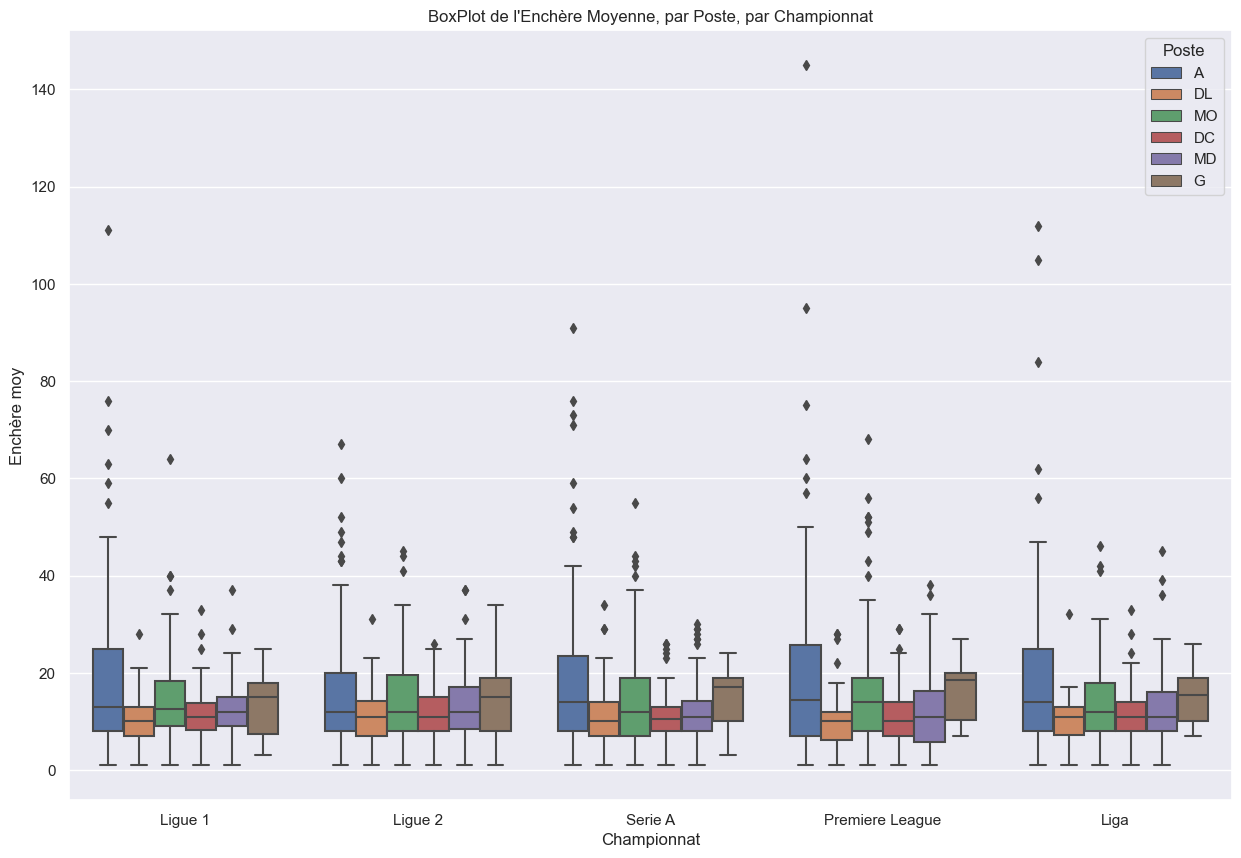

In [16]:
fig, ax=plt.subplots(figsize=(15,10))
ax.set_title("BoxPlot de l'Enchère Moyenne, par Poste, par Championnat", fontsize = 12)
sns.boxplot(x = 'Championnat' , y = 'Enchère moy', data = total[total['Cote']>0.5], hue = 'Poste');
#On observe que les utilisateurs sont prêts a dépenser beaucoup plus pour les attaquants,
#On en déduis que ceux-ci sont plus décisifs dans le jeu, ou pour obtenir une bonne note vs l'adversaire

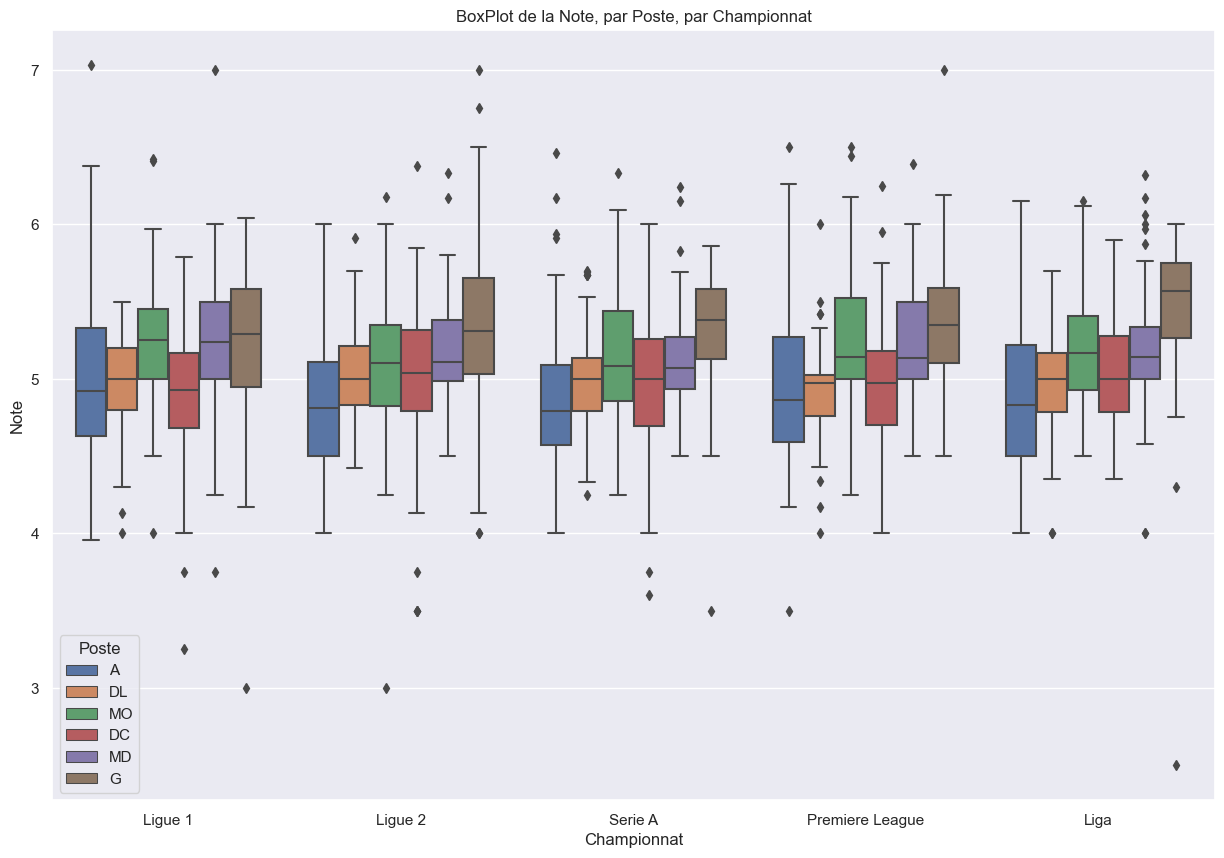

In [17]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(x = 'Championnat' , y = 'Note', data = total[total['Cote']>0.5], hue = 'Poste')
ax.set_title('BoxPlot de la Note, par Poste, par Championnat', fontsize = 12);
#Suite du précédent Graph, malgré les fortes sommes dépensées pour les attaquants,
#ces derniers ont globalement des notes plus basses quelque soit le championnat.

In [18]:
corrG = G.iloc[:, 1:28]
corrD = D.iloc[:, 1:41]
corrM = M.iloc[:, 1:41]
corrA = A.iloc[:, 1:41]

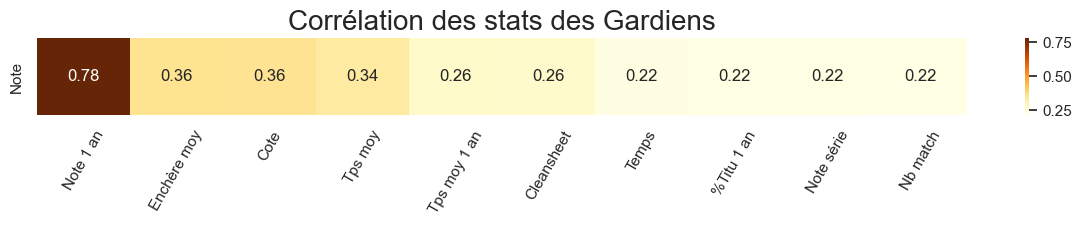

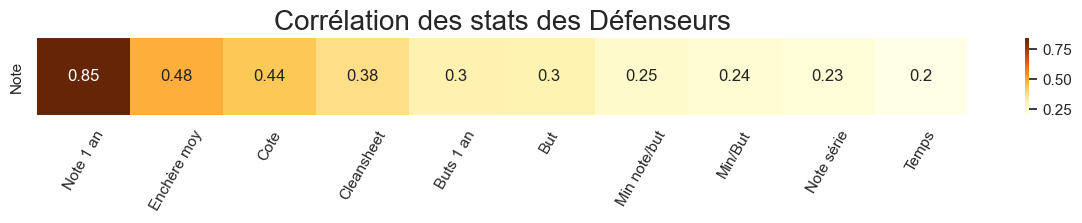

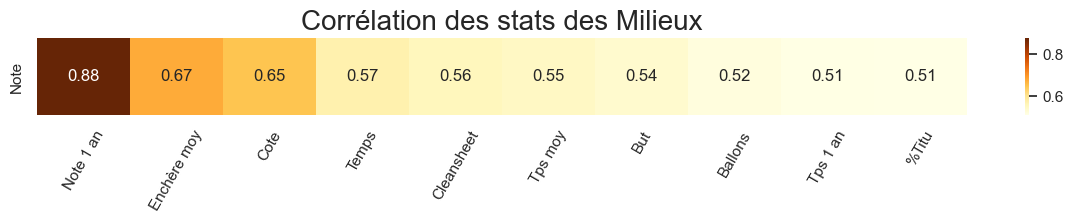

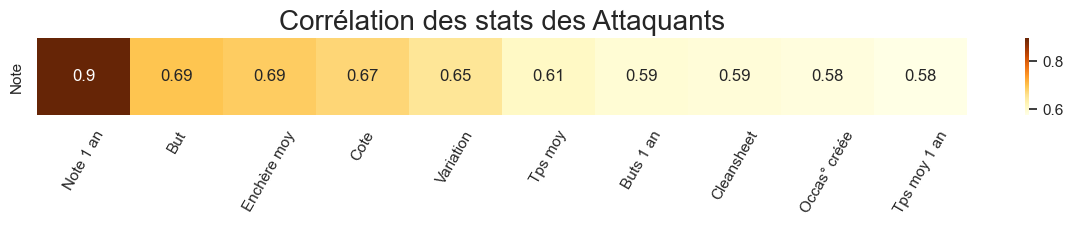

In [19]:
#Les prochains graphs sont des corrélations entre la notes et les différentes statistiques
#prises en compte lors d'un match, par zone de terrain (Gardiens, Défenseurs, Milieux, Attaquants)

corG = corrG.corr()


corG = corG.loc[['Note']].sort_values(by = 'Note', axis = 1, ascending = False)
corG10 = corG.iloc[:,1:11] 

fig, ax=plt.subplots(figsize=(15,1))
sns.heatmap(corG10, annot=True, ax=ax, cmap='YlOrBr')
ax.set_title('Corrélation des stats des Gardiens', fontsize = 20)
ax.tick_params(axis='x', rotation=60);

corD = corrD.corr()

corD = corD.loc[['Note']].sort_values(by = 'Note', axis = 1, ascending = False)
corD10 = corD.iloc[:,1:11] 

fig, ax=plt.subplots(figsize=(15,1))
sns.heatmap(corD10, annot=True, ax=ax, cmap='YlOrBr')
ax.set_title('Corrélation des stats des Défenseurs', fontsize = 20)
ax.tick_params(axis='x', rotation=60);

corM = corrM.corr()

corM = corM.loc[['Note']].sort_values(by = 'Note', axis = 1, ascending = False)
corM10 = corM.iloc[:,1:11] 

fig, ax=plt.subplots(figsize=(15,1))
sns.heatmap(corM10, annot=True, ax=ax, cmap='YlOrBr')
ax.set_title('Corrélation des stats des Milieux', fontsize = 20)
ax.tick_params(axis='x', rotation=60);


corA = corrA.corr()

corA = corA.loc[['Note']].sort_values(by = 'Note', axis = 1, ascending = False)
corA10 = corA.iloc[:,1:11] 

fig, ax=plt.subplots(figsize=(15,1))
sns.heatmap(corA10, annot=True, ax=ax, cmap='YlOrBr')
ax.set_title('Corrélation des stats des Attaquants', fontsize = 20)
ax.tick_params(axis='x', rotation=60);

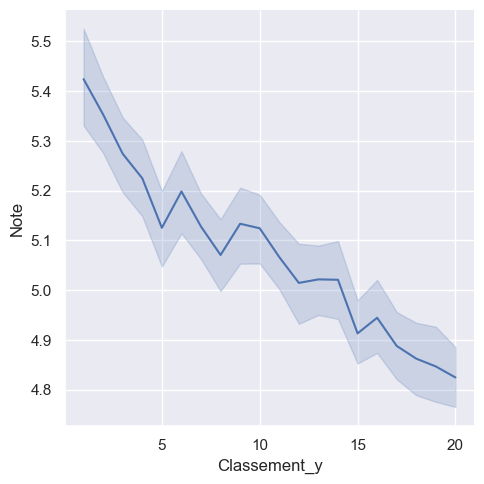

In [20]:
total_test = total.merge(right = classements, on = 'Club', how = 'left')


sns.relplot(y='Note', x='Classement_y', kind='line', data=total_test[total_test['Note']>0]);

#Graph indiquant que plus une équipe est bien classé, plus la note moyenne d'un joueur est élevée.

In [21]:
resultat_note_range = total.groupby("Note_range")["G.","N.","P."].mean().reset_index()
resultat_note_range

C:\Users\flo-6\AppData\Local\Temp\ipykernel_12808\1955265387.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resultat_note_range = total.groupby("Note_range")["G.","N.","P."].mean().reset_index()


,Note_range,G.,N.,P.
0,2 - entre 2 et 4,5.800000,4.666667,8.466667
1,3 - entre 4 et 6,6.806140,4.901316,7.130263
2,4 - entre 6 et 8,10.484375,3.765625,4.656250


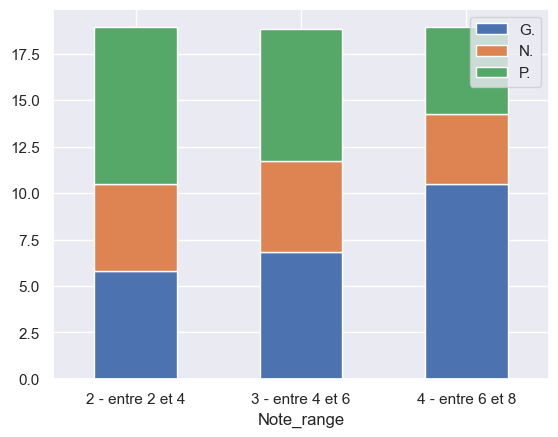

In [22]:
resultat_note_range.plot.bar(x = 'Note_range', 
                             y=["G.","N.","P."],
                             stacked=True, rot=0,
                             alpha=1);
#Hraph en corrélation avec le précédent, plus une équipe a de victoires, plus la note de ses joueurs est élevé.

In [23]:
Enchère_moy_range_note = total.groupby("Enchère_moy_range")["Note"].median().reset_index()
Enchère_moy_range_note

#

,Enchère_moy_range,Note
0,1 - moins de 20,5.00
1,2 - entre 20 et 40,5.45
2,3 - entre 40 et 60,5.63
3,4 - entre 60 et 80,5.78
4,5 - 80 et plus,6.15


<Axes: xlabel='Enchère_moy_range', ylabel='Note'>

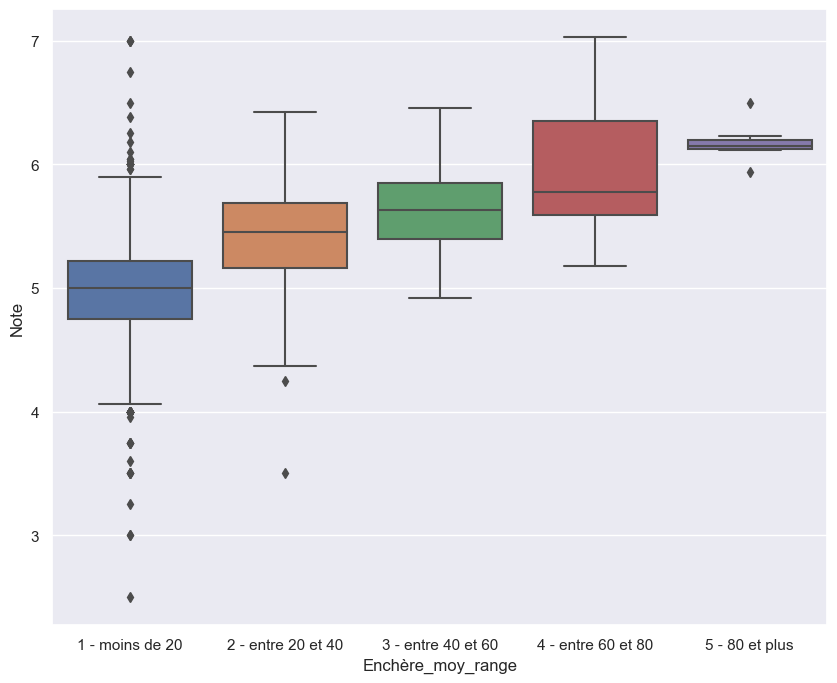

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Enchère_moy_range', y='Note', data=total, ax =ax,
           order = ['1 - moins de 20','2 - entre 20 et 40', '3 - entre 40 et 60', '4 - entre 60 et 80', '5 - 80 et plus'])

#Graph montrant que les joueurs ayant une enchère plus élevé ont une note moins dispersé, et avec peu d'écart les un des autres.

In [25]:
moy_poste_champ = total.groupby( by = [ 'Championnat','Club','Poste']).mean()

moy_poste_champ = moy_poste_champ.reset_index()

moy_poste_champ_l1 = moy_poste_champ[moy_poste_champ['Championnat'] == 'Ligue 1']

moy_poste_champ_pl = moy_poste_champ[moy_poste_champ['Championnat'] == 'Premiere League']

moy_poste_champ_la = moy_poste_champ[moy_poste_champ['Championnat'] == 'Liga']

moy_poste_champ_sa = moy_poste_champ[moy_poste_champ['Championnat'] == 'Serie A']

moy_poste_champ_l2 = moy_poste_champ[moy_poste_champ['Championnat'] == 'Ligue 2']

#On regroupe la note moyenne par Championnat-> Club -> Poste.
#Cela peut servir a identifier les points forts/faibles des clubs sur des postes ciblés par exemple.

C:\Users\flo-6\AppData\Local\Temp\ipykernel_12808\919287264.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moy_poste_champ = total.groupby( by = [ 'Championnat','Club','Poste']).mean()


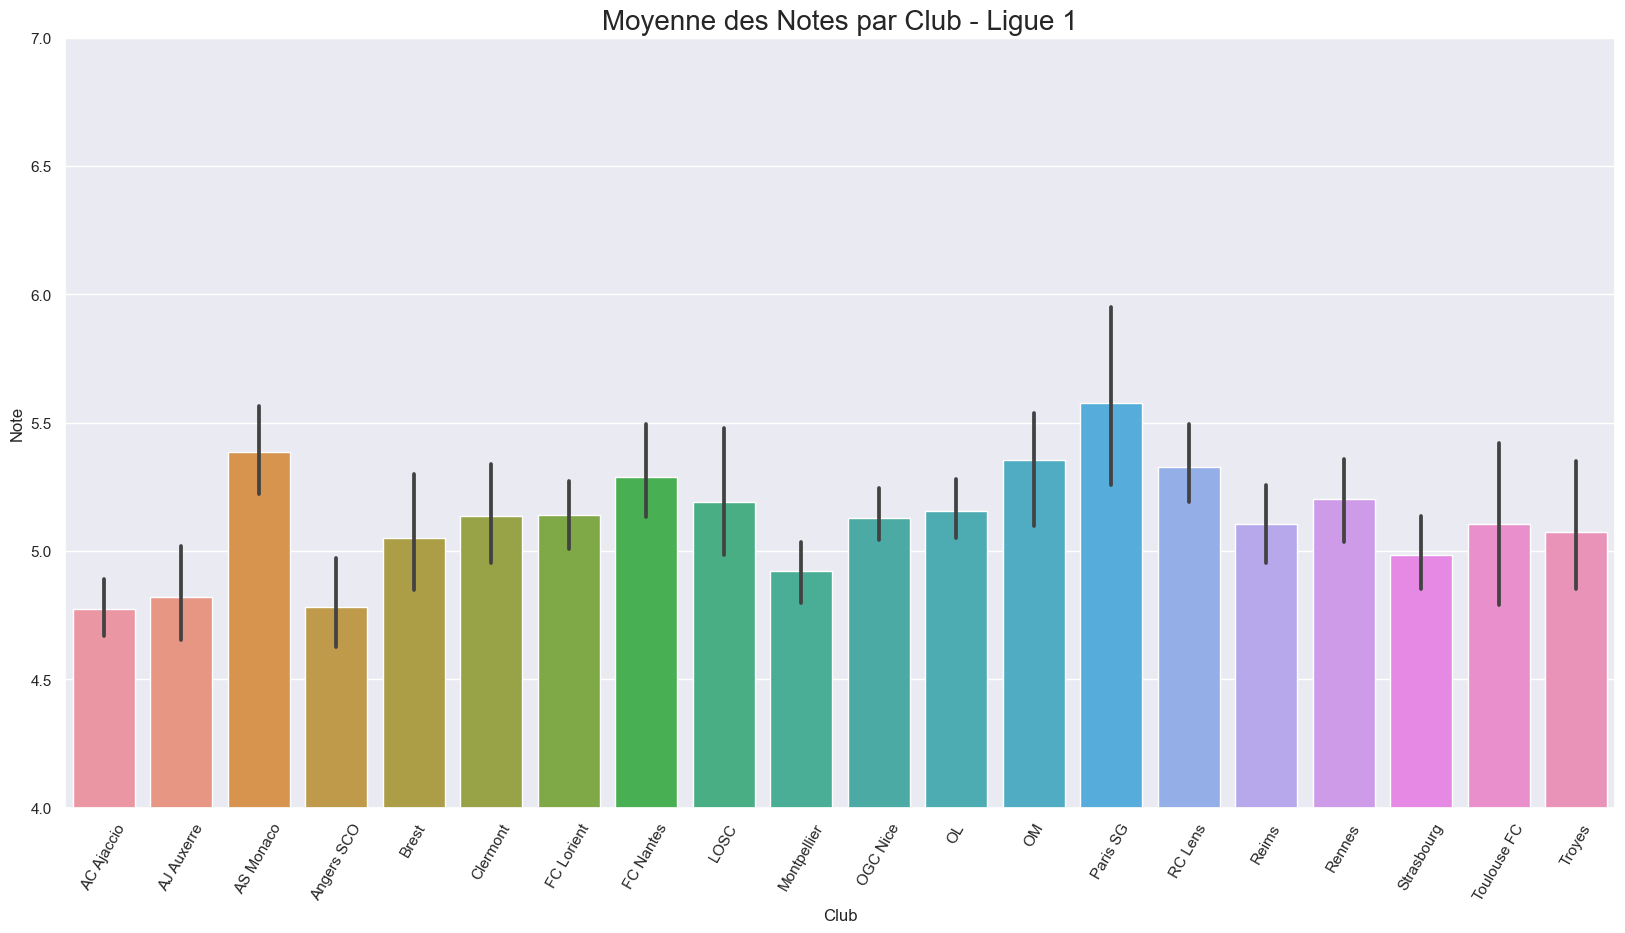

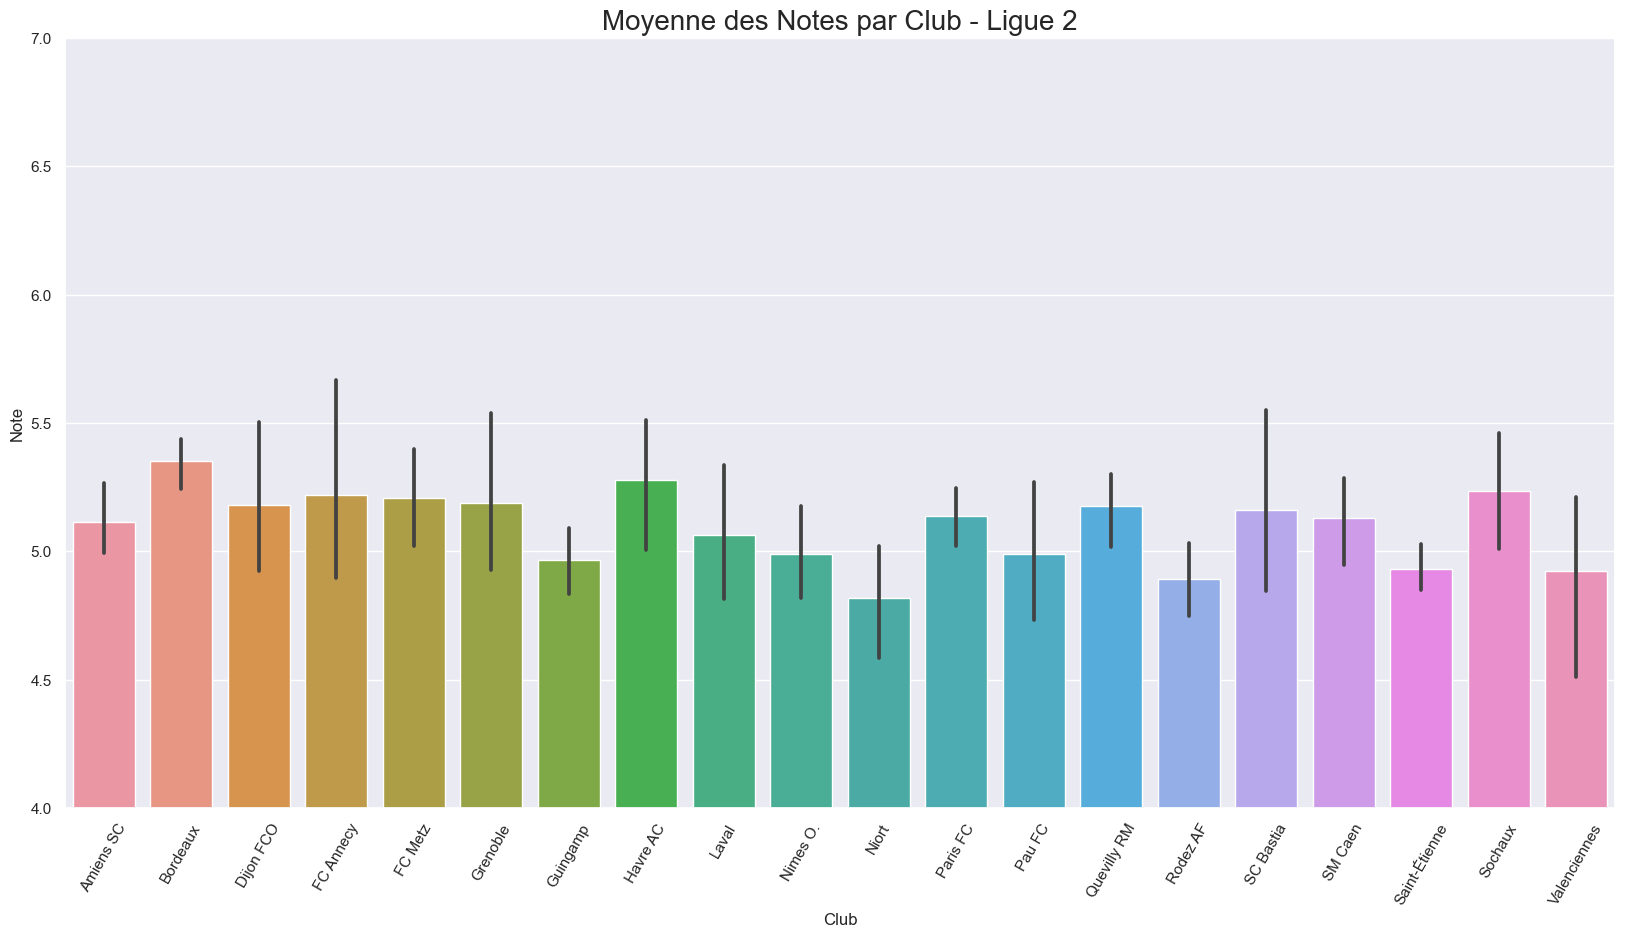

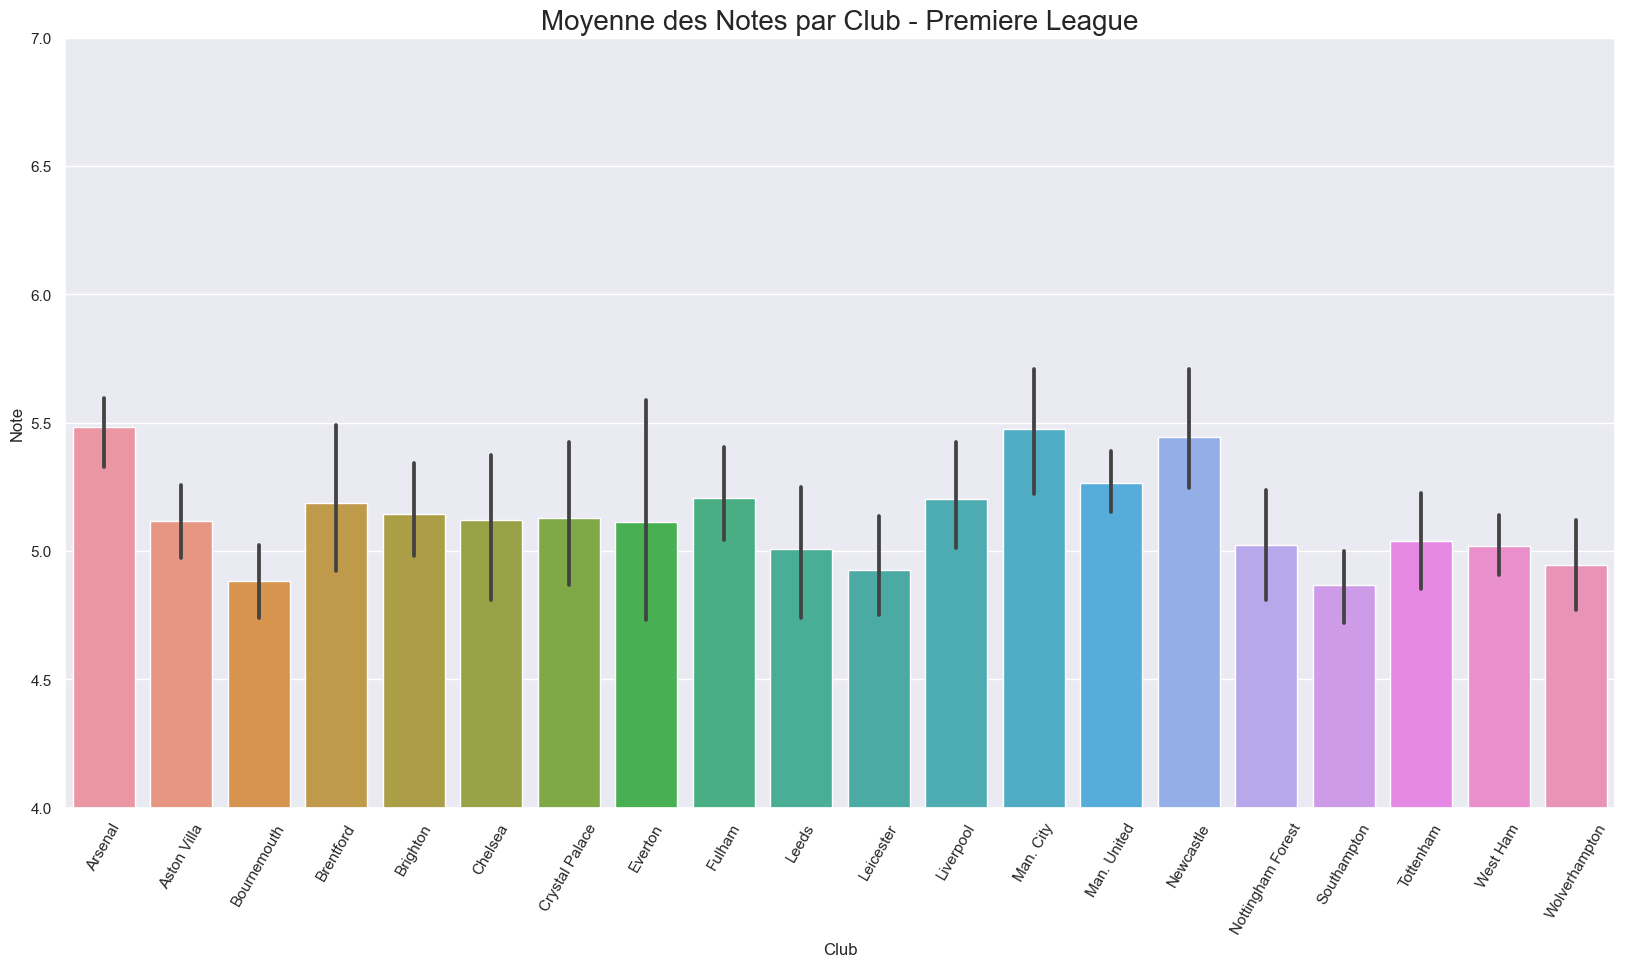

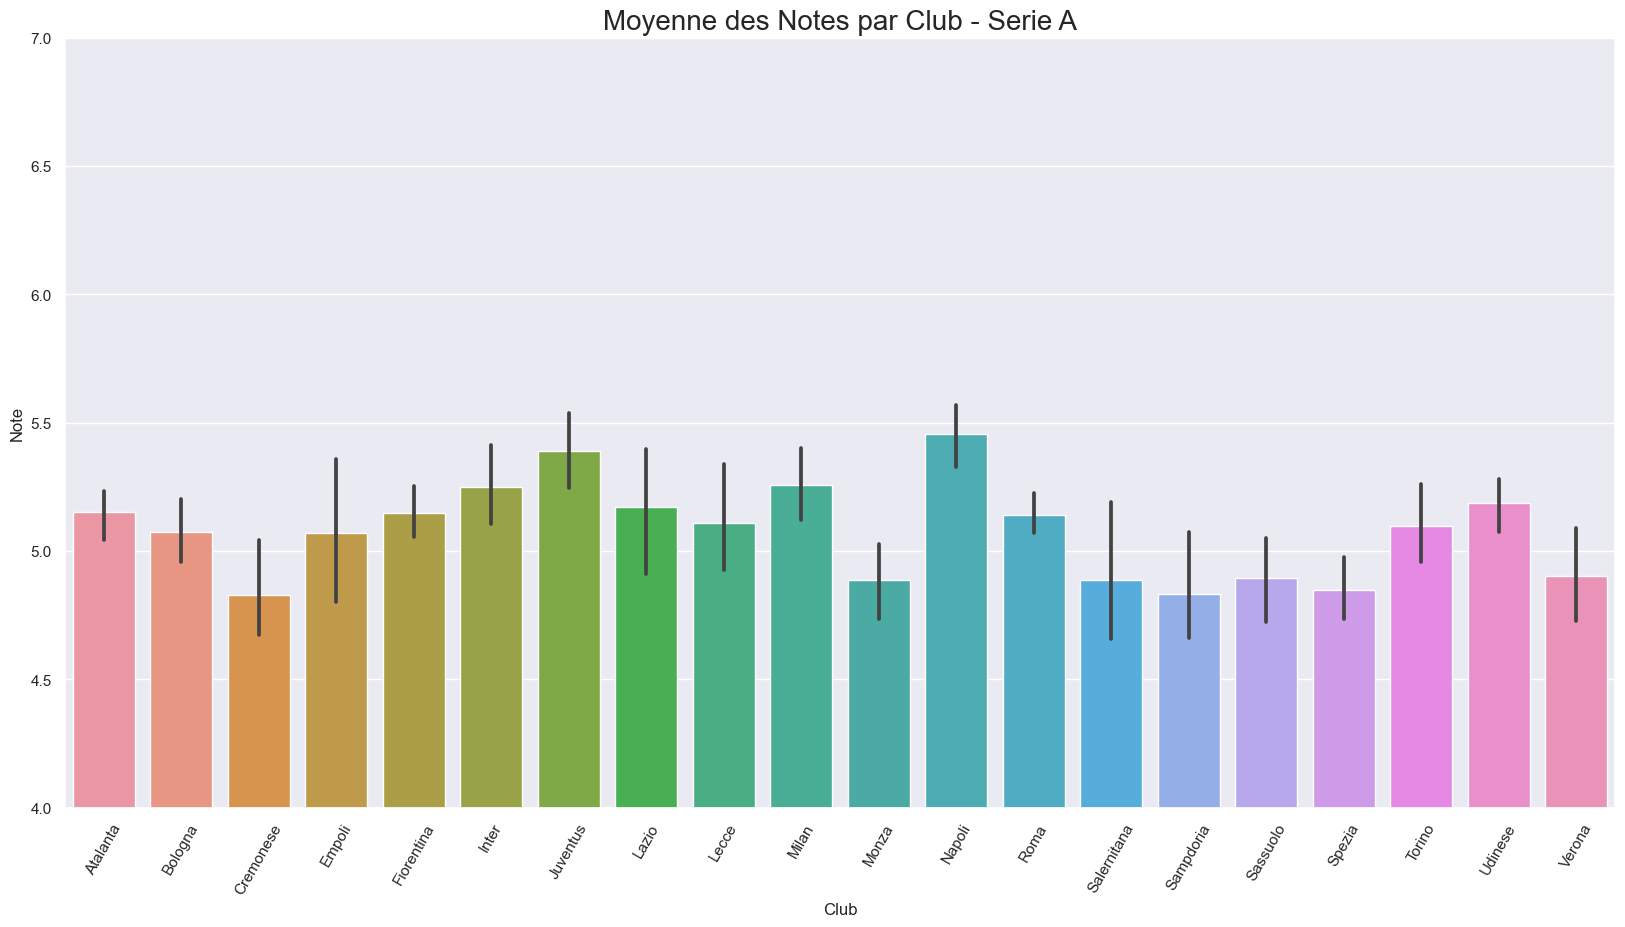

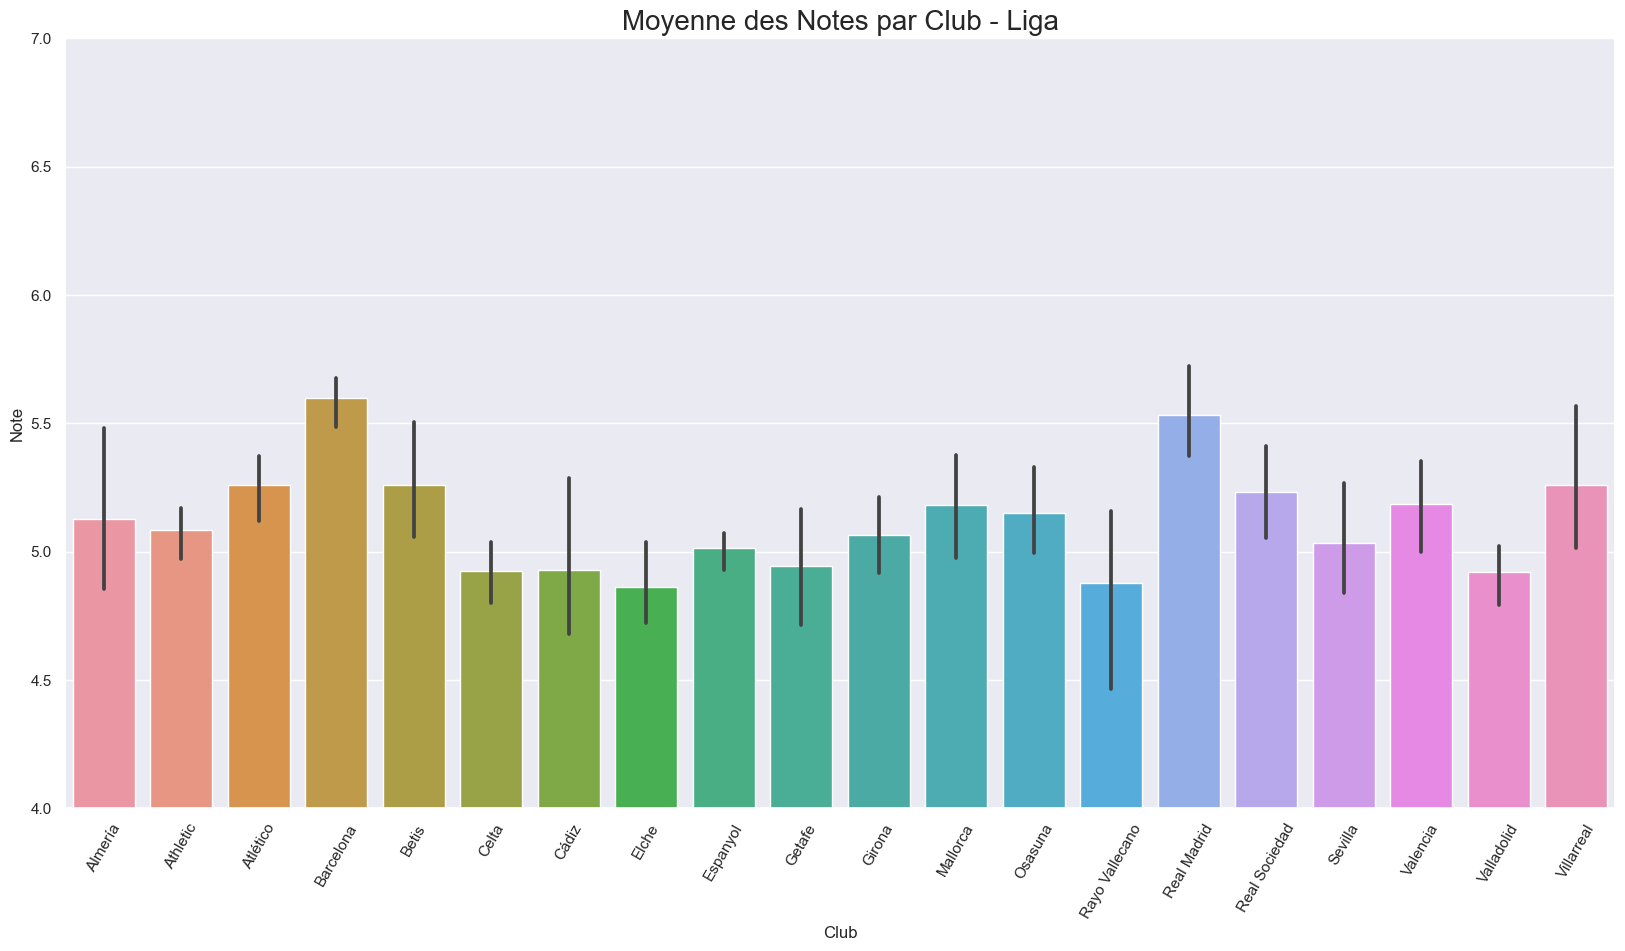

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot( x= 'Club', y ='Note', data = moy_poste_champ_l1, ax = ax)
ax.set_ylim(4,7)
ax.set_title('Moyenne des Notes par Club - Ligue 1', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot( x= 'Club', y ='Note', data = moy_poste_champ_l2, ax = ax)
ax.set_ylim(4,7)
ax.set_title('Moyenne des Notes par Club - Ligue 2', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot( x= 'Club', y ='Note', data = moy_poste_champ_pl, ax = ax)
ax.set_ylim(4,7)
ax.set_title('Moyenne des Notes par Club - Premiere League', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot( x= 'Club', y ='Note', data = moy_poste_champ_sa, ax = ax)
ax.set_ylim(4,7)
ax.set_title('Moyenne des Notes par Club - Serie A', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot( x= 'Club', y ='Note', data = moy_poste_champ_la, ax = ax)
ax.set_ylim(4,7)
ax.set_title('Moyenne des Notes par Club - Liga', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

#Représentation de la not moyenne de tout les joueurs d'un Club, par championnat.
#Permet de cibler rapidement les clubs dans lesquels aller chercher ses joueurs lors du mercato.

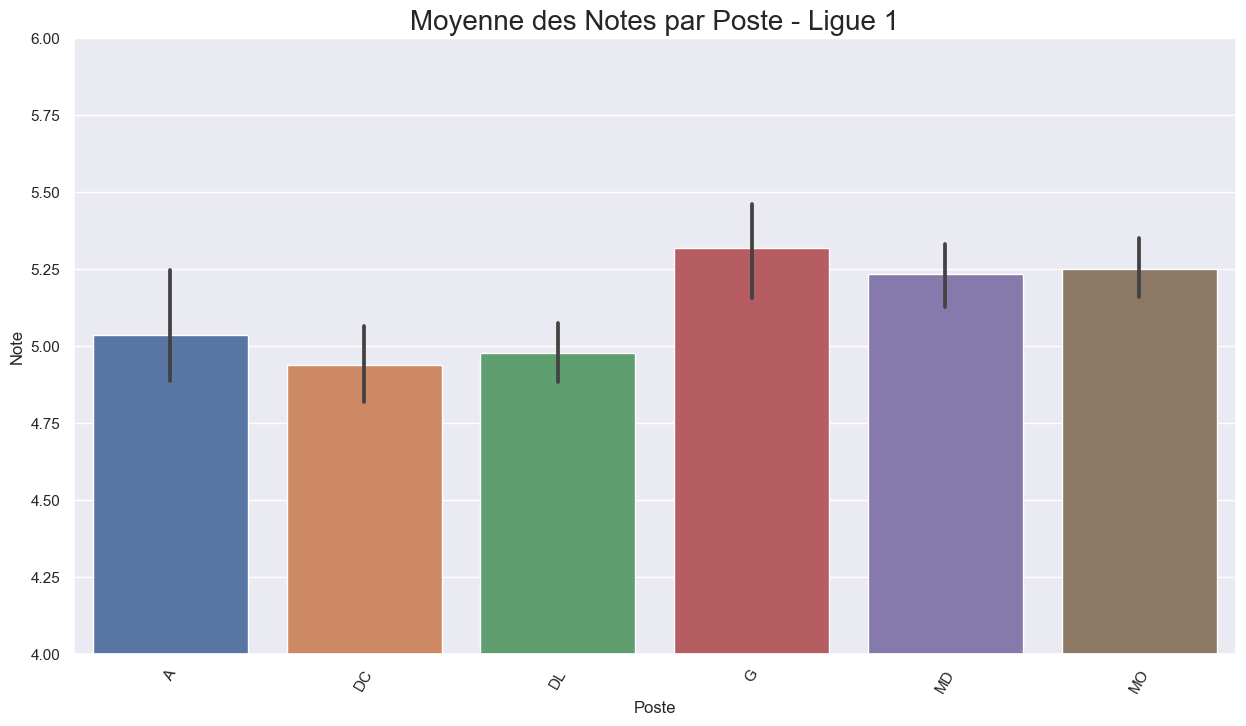

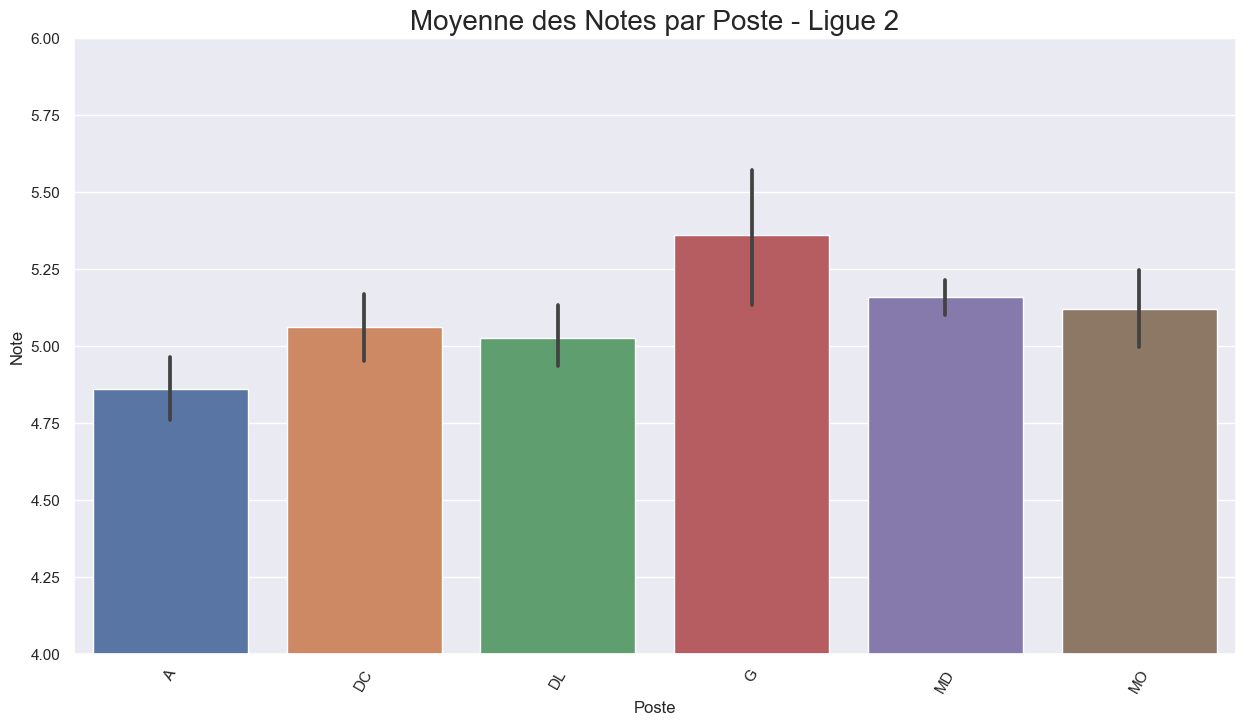

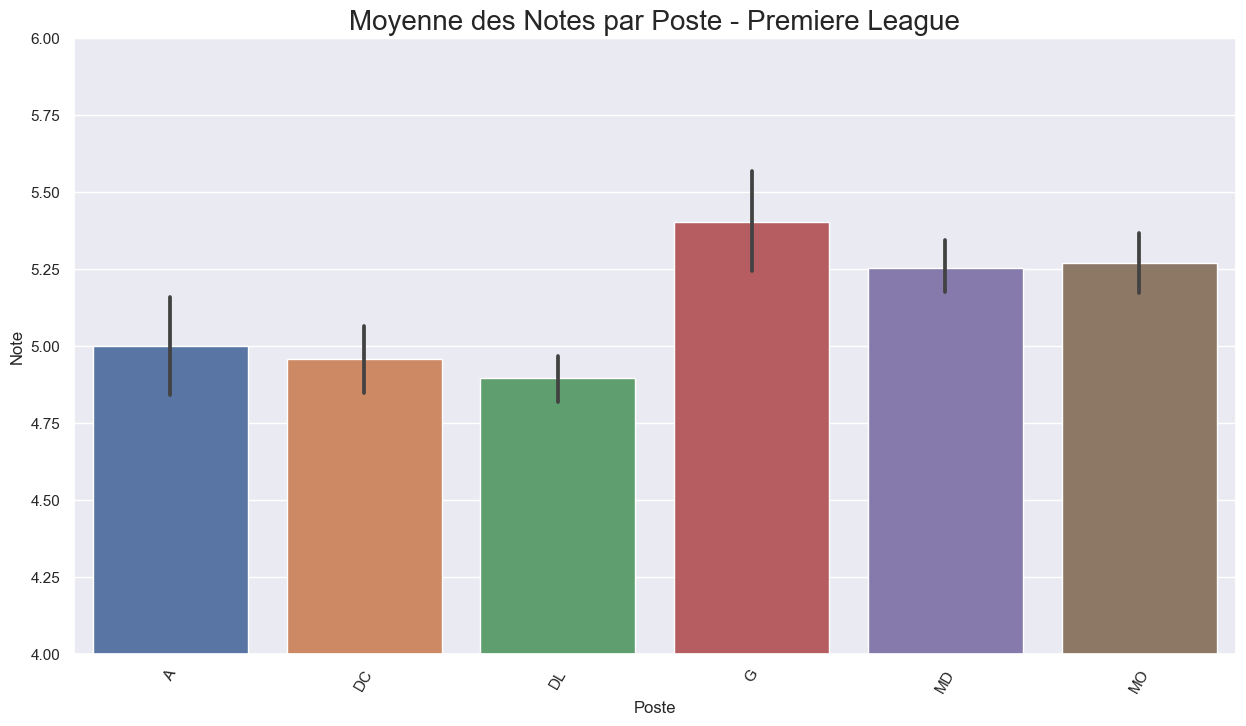

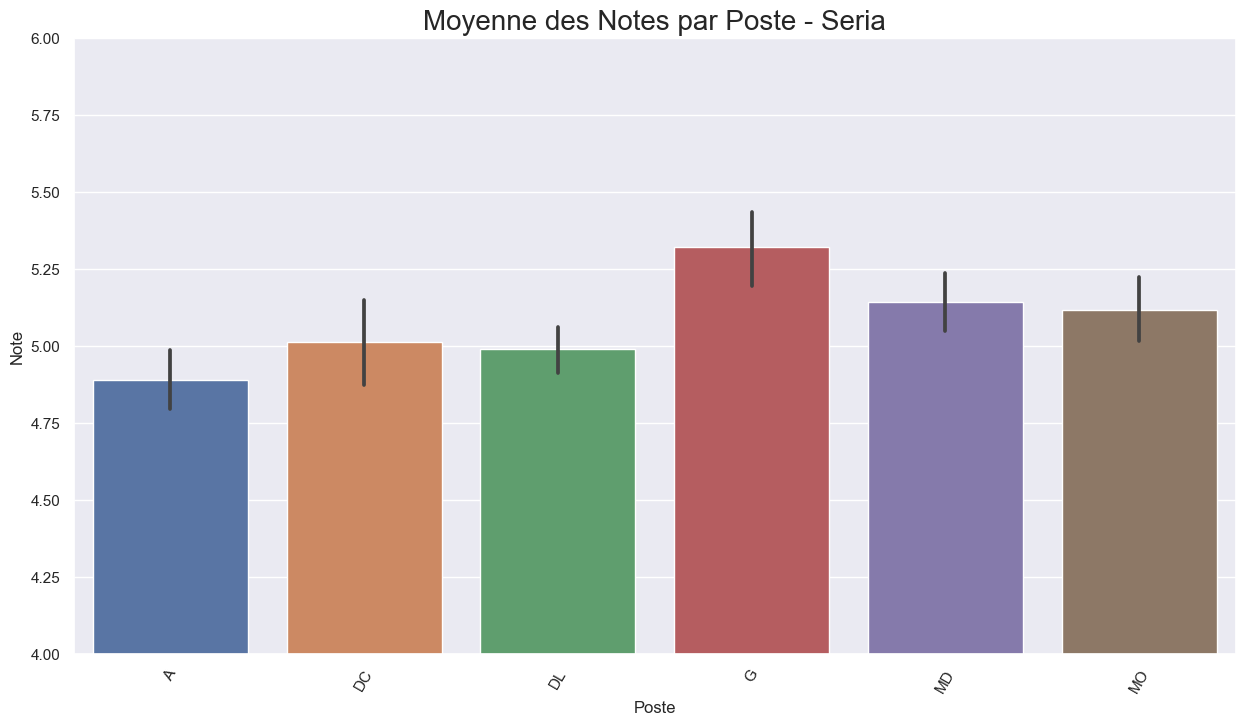

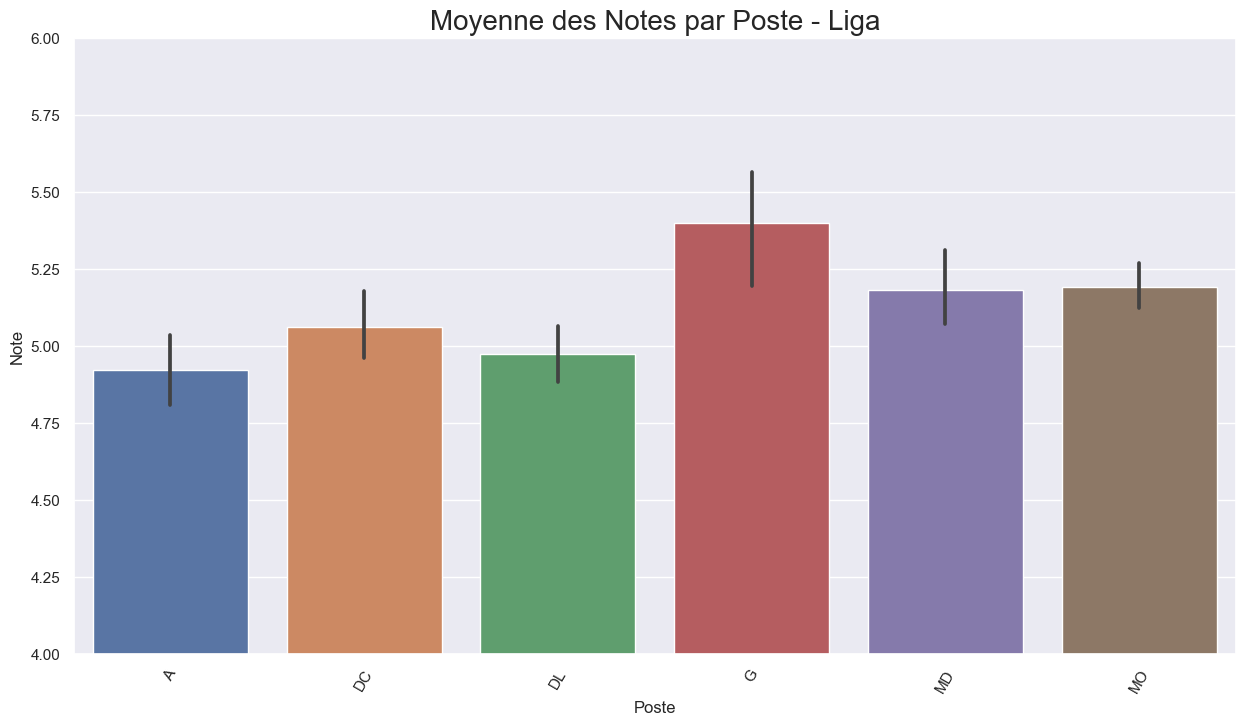

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot( x= 'Poste', y ='Note', data = moy_poste_champ_l1, ax = ax)
ax.set_ylim(4,6)
ax.set_title('Moyenne des Notes par Poste - Ligue 1', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot( x= 'Poste', y ='Note', data = moy_poste_champ_l2, ax = ax)
ax.set_ylim(4,6)
ax.set_title('Moyenne des Notes par Poste - Ligue 2', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot( x= 'Poste', y ='Note', data = moy_poste_champ_pl, ax = ax)
ax.set_ylim(4,6)
ax.set_title('Moyenne des Notes par Poste - Premiere League', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot( x= 'Poste', y ='Note', data = moy_poste_champ_sa, ax = ax)
ax.set_ylim(4,6)
ax.set_title('Moyenne des Notes par Poste - Seria', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot( x= 'Poste', y ='Note', data = moy_poste_champ_la, ax = ax)
ax.set_ylim(4,6)
ax.set_title('Moyenne des Notes par Poste - Liga', fontsize = 20)
ax.tick_params(axis='x', rotation=60)

In [28]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap
from bokeh.models import TabPanel, Tabs
from bokeh.models.tools import HoverTool
output_notebook()

Loading BokehJS ...

In [29]:
import warnings
warnings.filterwarnings('ignore', category=Warning)

total_bokeh = total[['Championnat','Club','Note','Poste']]

G_l1_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Ligue 1')&(total_bokeh['Poste'] == 'G')]
G_l2_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Ligue 2')&(total_bokeh['Poste'] == 'G')]
G_pl_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Premiere League')&(total_bokeh['Poste'] == 'G')]
G_sa_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Serie A')&(total_bokeh['Poste'] == 'G')]
G_la_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Liga')&(total_bokeh['Poste'] == 'G')]

D_l1_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Ligue 1')&((total_bokeh['Poste'] == 'DL')|(total_bokeh['Poste'] == 'DC'))]
D_l2_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Ligue 2')&((total_bokeh['Poste'] == 'DL')|(total_bokeh['Poste'] == 'DC'))]
D_pl_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Premiere League')&((total_bokeh['Poste'] == 'DL')|(total_bokeh['Poste'] == 'DC'))]
D_sa_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Serie A')&((total_bokeh['Poste'] == 'DL')|(total_bokeh['Poste'] == 'DC'))]
D_la_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Liga')&((total_bokeh['Poste'] == 'DL')|(total_bokeh['Poste'] == 'DC'))]

M_l1_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Ligue 1')&((total_bokeh['Poste'] == 'MD')|(total_bokeh['Poste'] == 'MO'))]
M_l2_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Ligue 2')&((total_bokeh['Poste'] == 'MD')|(total_bokeh['Poste'] == 'MO'))]
M_pl_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Premiere League')&((total_bokeh['Poste'] == 'MD')|(total_bokeh['Poste'] == 'MO'))]
M_sa_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Serie A')&((total_bokeh['Poste'] == 'MD')|(total_bokeh['Poste'] == 'MO'))]
M_la_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Liga')&((total_bokeh['Poste'] == 'MD')|(total_bokeh['Poste'] == 'MO'))]

A_l1_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Ligue 1')&(total_bokeh['Poste'] == 'A')]
A_l2_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Ligue 2')&(total_bokeh['Poste'] == 'A')]
A_pl_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Premiere League')&(total_bokeh['Poste'] == 'A')]
A_sa_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Serie A')&(total_bokeh['Poste'] == 'A')]
A_la_bokeh = total_bokeh[(total_bokeh['Championnat'] == 'Liga')&(total_bokeh['Poste'] == 'A')]

moy_G_l1 = G_l1_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_G_l1 = moy_G_l1.reset_index()
moy_G_l1['Poste'] = 'Gardiens'

moy_D_l1 = D_l1_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_D_l1 = moy_D_l1.reset_index()
moy_D_l1['Poste'] = 'Défenseurs'

moy_M_l1 = M_l1_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_M_l1 = moy_M_l1.reset_index()
moy_M_l1['Poste'] = 'Milieux'

moy_A_l1 = A_l1_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_A_l1 = moy_A_l1.reset_index()
moy_A_l1['Poste'] = 'Attaquants'


moy_G_l2 = G_l2_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_G_l2 = moy_G_l2.reset_index()
moy_G_l2['Poste'] = 'Gardiens'

moy_D_l2 = D_l2_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_D_l2 = moy_D_l2.reset_index()
moy_D_l2['Poste'] = 'Défenseurs'

moy_M_l2 = M_l2_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_M_l2 = moy_M_l2.reset_index()
moy_M_l2['Poste'] = 'Milieux'

moy_A_l2 = A_l2_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_A_l2 = moy_A_l2.reset_index()
moy_A_l2['Poste'] = 'Attaquants'


moy_G_pl = G_pl_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_G_pl = moy_G_pl.reset_index()
moy_G_pl['Poste'] = 'Gardiens'

moy_D_pl = D_pl_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_D_pl = moy_D_pl.reset_index()
moy_D_pl['Poste'] = 'Défenseurs'

moy_M_pl = M_pl_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_M_pl = moy_M_pl.reset_index()
moy_M_pl['Poste'] = 'Milieux'

moy_A_pl = A_pl_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_A_pl = moy_A_pl.reset_index()
moy_A_pl['Poste'] = 'Attaquants'


moy_G_sa = G_sa_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_G_sa = moy_G_sa.reset_index()
moy_G_sa['Poste'] = 'Gardiens'

moy_D_sa = D_sa_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_D_sa = moy_D_sa.reset_index()
moy_D_sa['Poste'] = 'Défenseurs'

moy_M_sa = M_sa_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_M_sa = moy_M_sa.reset_index()
moy_M_sa['Poste'] = 'Milieux'

moy_A_sa = A_sa_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_A_sa = moy_A_sa.reset_index()
moy_A_sa['Poste'] = 'Attaquants'


moy_G_la = G_la_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_G_la = moy_G_la.reset_index()
moy_G_la['Poste'] = 'Gardiens'

moy_D_la = D_la_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_D_la = moy_D_la.reset_index()
moy_D_la['Poste'] = 'Défenseurs'

moy_M_la = M_la_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_M_la = moy_M_la.reset_index()
moy_M_la['Poste'] = 'Milieux'

moy_A_la = A_la_bokeh.groupby( by = [ 'Championnat','Club']).mean()
moy_A_la = moy_A_la.reset_index()
moy_A_la['Poste'] = 'Attaquants'

l1_bokeh = pd.concat([moy_G_l1, moy_D_l1, moy_M_l1, moy_A_l1], axis = 0)
l2_bokeh = pd.concat([moy_G_l2, moy_D_l2, moy_M_l2, moy_A_l2], axis = 0)
pl_bokeh = pd.concat([moy_G_pl, moy_D_pl, moy_M_pl, moy_A_pl], axis = 0)
sa_bokeh = pd.concat([moy_G_sa, moy_D_sa, moy_M_sa, moy_A_sa], axis = 0)
la_bokeh = pd.concat([moy_G_la, moy_D_la, moy_M_la, moy_A_la], axis = 0)

warnings.resetwarnings()

In [30]:
colors = ['#b55d60', '#5F9E6E', '#8d7866', '#5975A4']
valeurs = ['Gardiens','Défenseurs','Milieux', 'Attaquants']
poste_order = {'Gardiens': 0, 'Défenseurs': 1, 'Milieux': 2, 'Attaquants': 3}
tooltips=[('Club, Poste', '@x'), ('Note', '@top')]

In [37]:
modalite_l1 = l1_bokeh['Club'].unique().tolist()
modalite_l1 = sorted(modalite_l1)
valeurs = ['Gardiens','Défenseurs','Milieux', 'Attaquants']
x = [(i, j) for i in modalite_l1 for j in valeurs]

poste_order = {'Gardiens': 0, 'Défenseurs': 1, 'Milieux': 2, 'Attaquants': 3}
l1_bokeh['Poste_Order'] = l1_bokeh['Poste'].map(poste_order)
l1_bokeh = l1_bokeh.sort_values(by=['Club', 'Poste_Order'])
l1_bokeh = l1_bokeh.drop('Poste_Order', axis=1)
notes_l1 = l1_bokeh['Note']

l1_bokeh = l1_bokeh.reset_index(drop=True)

source_l1 = ColumnDataSource({
    'x' : x,
    'top' : l1_bokeh['Note']})

factor_range = FactorRange(factors=x)
p_l1 = figure(x_range=factor_range, width=1200, height=500, tooltips = tooltips)
p_l1.vbar(x='x', top='top', width=0.8, source=source_l1,
          line_color="white",fill_color=factor_cmap('x', palette=colors, factors=valeurs, start=1, end=2))


p_l1.xaxis.major_label_orientation = 'vertical'
p_l1.xaxis.group_label_orientation = 45
p_l1.y_range.start = 4.5
p_l1.y_range.end = 6.8
show(p_l1)

In [35]:
modalite_l2 = l2_bokeh['Club'].unique().tolist()
modalite_l2 = sorted(modalite_l2)

x = [(i, j) for i in modalite_l2 for j in valeurs]

l2_bokeh['Poste_Order'] = l2_bokeh['Poste'].map(poste_order)
l2_bokeh = l2_bokeh.sort_values(by=['Club', 'Poste_Order'])
l2_bokeh = l2_bokeh.drop('Poste_Order', axis=1)
l2_bokeh = l2_bokeh.reset_index(drop=True)

source_l2 = ColumnDataSource({
    'x' : x,
    'top' : l2_bokeh['Note']})

factor_range = FactorRange(factors=x)
p_l2 = figure(x_range=factor_range, width=1200, height=500, tooltips = tooltips)
p_l2.vbar(x='x', top='top', width=0.8, source=source_l2, line_color="white", 
      fill_color=factor_cmap('x', palette=colors, factors=valeurs, start=1, end=2))

p_l2.xaxis.major_label_orientation = 'vertical'
p_l2.xaxis.group_label_orientation = 45
p_l2.y_range.start = 3.9
p_l2.y_range.end = 6.5
show(p_l2)


In [38]:
modalite_pl = pl_bokeh['Club'].unique().tolist()
modalite_pl = sorted(modalite_pl)

x = [(i, j) for i in modalite_pl for j in valeurs]


pl_bokeh['Poste_Order'] = pl_bokeh['Poste'].map(poste_order)
pl_bokeh = pl_bokeh.sort_values(by=['Club', 'Poste_Order'])
pl_bokeh = pl_bokeh.drop('Poste_Order', axis=1)
notes_pl = pl_bokeh['Note']

pl_bokeh = pl_bokeh.reset_index(drop=True)

source_pl = ColumnDataSource({
    'x' : x,
    'top' : notes_pl})

factor_range = FactorRange(factors=x)
p_pl = figure(x_range=factor_range, width=1200, height=500, tooltips = tooltips)
p_pl.vbar(x='x', top='top', width=0.8, source=source_pl, line_color="white",
      fill_color=factor_cmap('x', palette=colors, factors=valeurs, start=1, end=2))

p_pl.xaxis.major_label_orientation = 'vertical'
p_pl.xaxis.group_label_orientation = 45
p_pl.y_range.start = 4.2
p_pl.y_range.end = 6.4
show(p_pl)


In [39]:
modalite_sa = sa_bokeh['Club'].unique().tolist()
modalite_sa = sorted(modalite_sa)

x = [(i, j) for i in modalite_sa for j in valeurs]


sa_bokeh['Poste_Order'] = sa_bokeh['Poste'].map(poste_order)
sa_bokeh = sa_bokeh.sort_values(by=['Club', 'Poste_Order'])
sa_bokeh = sa_bokeh.drop('Poste_Order', axis=1)
notes_sa = sa_bokeh['Note']

sa_bokeh = sa_bokeh.reset_index(drop=True)

source_sa = ColumnDataSource({
    'x' : x,
    'top' : notes_sa})

factor_range = FactorRange(factors=x)
p_sa = figure(x_range=factor_range, width=1200, height=500, tooltips = tooltips)
p_sa.vbar(x='x', top='top', width=0.8, source=source_sa, line_color="white",
      fill_color=factor_cmap('x', palette=colors, factors=valeurs, start=1, end=2))

p_sa.xaxis.major_label_orientation = 'vertical'
p_sa.xaxis.group_label_orientation = 45
p_sa.y_range.start = 4.4
p_sa.y_range.end = 5.8
show(p_sa)

In [40]:
modalite_la = la_bokeh['Club'].unique().tolist()
modalite_la = sorted(modalite_la)

x = [(i, j) for i in modalite_la for j in valeurs]


la_bokeh['Poste_Order'] = la_bokeh['Poste'].map(poste_order)
la_bokeh = la_bokeh.sort_values(by=['Club', 'Poste_Order'])
la_bokeh = la_bokeh.drop('Poste_Order', axis=1)
notes_la = la_bokeh['Note']

la_bokeh = la_bokeh.reset_index(drop=True)

source_la = ColumnDataSource({
    'x' : x,
    'top' : notes_la})

factor_range = FactorRange(factors=x)
p_la = figure(x_range=factor_range, width=1200, height=500, tooltips = tooltips)
p_la.vbar(x='x', top='top', width=0.8, source=source_la, line_color="white",
      fill_color=factor_cmap('x', palette=colors, factors=valeurs, start=1, end=2))

p_la.xaxis.major_label_orientation = 'vertical'
p_la.xaxis.group_label_orientation = 45
p_la.y_range.start = 3.8
p_la.y_range.end = 6
show(p_la)

In [41]:
tab_l1 = TabPanel(child=p_l1, title="Ligue 1")
tab_l2 = TabPanel(child=p_l2, title="Ligue 2")
tab_pl = TabPanel(child=p_pl, title="Premiere League")
tab_sa = TabPanel(child=p_sa, title="Seria")
tab_la = TabPanel(child=p_la, title="Liga")
bokeh = Tabs(tabs=[tab_l1, tab_l2, tab_pl, tab_sa, tab_la])
show(bokeh)

In [ ]:
total_df.to_csv('../data/DataFrames/total_df', index=True)
total_j.to_csv('../data/DataFrames/total_j', index=True)
total.to_csv('../data/DataFrames/total', index=True)
G_df.to_csv('../data/DataFrames/G_df')
G.to_csv('../data/DataFrames/G_stat')
G_j.to_csv('../data/DataFrames/G_j')
D_df.to_csv('../data/DataFrames/D_df')
D.to_csv('../data/DataFrames/D_stat')
D_j.to_csv('../data/DataFrames/D_j')
M_df.to_csv('../data/DataFrames/M_df')
M.to_csv('../data/DataFrames/M_stat')
M_j.to_csv('../data/DataFrames/M_j')
A_df.to_csv('../data/DataFrames/A_df')
A.to_csv('../data/DataFrames/A_stat')
A_j.to_csv('../data/DataFrames/A_j')